<a href="https://colab.research.google.com/github/sabre-code/opencv-easyocr/blob/main/opencv-easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OPENCV EASYOCR

In [1]:
!pip install opencv-python -q
!pip install matplotlib -q
!pip install numpy -q
!pip install easyocr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 33.0 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/sabre-code/opencv-easyocr.git

Cloning into 'opencv-easyocr'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 18 (delta 1), reused 18 (delta 1), pack-reused 0
Receiving objects: 100% (18/18), 5.23 MiB | 7.87 MiB/s, done.
Resolving deltas: 100% (1/1), done.


### Importing packages

In [3]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
im1_path = '/content/opencv-easyocr/images/1_carplate.jpg'
im2_path = '/content/opencv-easyocr/images/2_handwriting.jpg'
im3_path = '/content/opencv-easyocr/images/3_invoice.jpeg'
im4_path = '/content/opencv-easyocr/images/carplate2.png'

### Extracting text

In [30]:
def recognize_text(img_path):
  '''loads an image and recognizes text.'''

  reader = easyocr.Reader(['en'])
  return reader.readtext(img_path)

In [31]:
result = recognize_text(im4_path)

In [32]:
result

[([[190, 128], [284, 128], [284, 154], [190, 154]],
  'CCC 444',
  0.8426513738109754)]

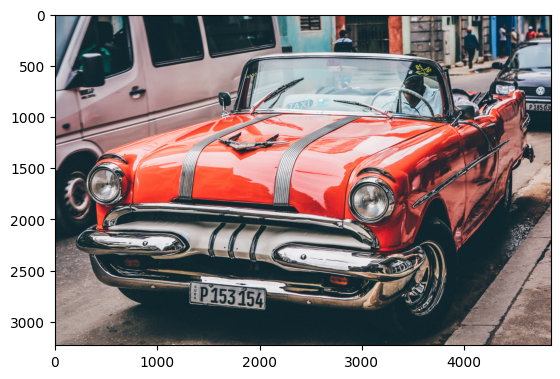

In [8]:
img_1 = cv2.imread(im1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

## Overlay recognized text on image using OpenCV

In [40]:
def overlay_ocr_text(img_path, save_name):
  '''loads an image, recognizes text, and overlays the text on the image'''

  #loads image
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  dpi = 40
  fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
  plt.figure()
  f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
  axarr[0].imshow(img)

  # recognize text
  result = recognize_text(img_path)
  # if OCR prob is over 0.5, overlay bounding box and text
  for (bbox, text, prob) in result:
      if prob >= 0.5:
          # display
          print(f'Detected text: {text} (Probability: {prob:.2f})')
          # get top-left and bottom-right bbox vertices
          (top_left, top_right, bottom_right, bottom_left) = bbox
          top_left = (int(top_left[0]), int(top_left[1]))
          bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
          # create a rectangle for bbox display
          cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=5)
          # put recognized text
          cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=3)

  # show and save image
  axarr[1].imshow(img)
  plt.savefig(f'/content/opencv-easyocr/output/{save_name}_overlay.jpg', bbox_inches='tight')


Detected text: CCC 444 (Probability: 0.84)


<Figure size 640x480 with 0 Axes>

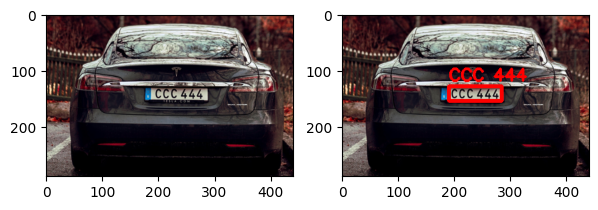

In [41]:
overlay_ocr_text(im4_path,'1_carplate')